In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy


In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

ushuaia ar
port alfred za
bredasdorp za
mataura pf
bredasdorp za
rikitea pf
kodiak us
albany au
kegayli uz
punta arenas cl
kaitangata nz
fernie ca
punta arenas cl
kongoussi bf
ushuaia ar
hermanus za
quesnel ca
tiksi ru
lolua tv
torbay ca
rikitea pf
airai pw
puerto escondido mx
vestbygda no
tawkar sd
port elizabeth za
iqaluit ca
puerto ayora ec
te anau nz
ushuaia ar
port alfred za
kapaa us
mataura pf
batagay-alyta ru
ust-maya ru
illoqqortoormiut gl
tasiilaq gl
talnakh ru
busselton au
illoqqortoormiut gl
saint anthony ca
aswan eg
le port re
busselton au
bodmin gb
inhambane mz
umzimvubu za
ushuaia ar
ushuaia ar
jamestown sh
waynesville us
nianzishan cn
samusu ws
illoqqortoormiut gl
saint-georges gf
tuktoyaktuk ca
cockburn town tc
taolanaro mg
hermanus za
shitanjing cn
santiago del estero ar
atuona pf
fairbanks us
kodiak us
port alfred za
kefalos gr
roznov cz
qaanaaq gl
khonuu ru
kavieng pg
bambous virieux mu
mataura pf
dalbandin pk
busselton au
barrow us
hithadhoo mv
tambo pe
illoqqortoor

butaritari ki
otane nz
tubmanburg lr
galiwinku au
atuona pf
amderma ru
qaanaaq gl
vaitupu wf
hobart au
ushuaia ar
arraial do cabo br
ushuaia ar
khromtau kz
kapaa us
klaksvik fo
atuona pf
palu id
gubkinskiy ru
atar mr
jumla np
ushuaia ar
chokurdakh ru
sao raimundo das mangabeiras br
johannesburg za
bolgatanga gh
constitucion cl
nalut ly
rikitea pf
khatanga ru
rikitea pf
tiksi ru
illoqqortoormiut gl
hermanus za
temaraia ki
narsaq gl
payson us
tuktoyaktuk ca
melfi td
rikitea pf
meulaboh id
rikitea pf
pevek ru
finschhafen pg
east london za
constitucion mx
sambava mg
provideniya ru
punta arenas cl
ushuaia ar
vaini to
cape town za
rikitea pf
hilo us
severo-kurilsk ru
vila vu
ponta do sol cv
albany au
nanortalik gl
hithadhoo mv
srivardhan in
rio cuarto ar
artvin tr
thompson ca
beringovskiy ru
hobart au
quatre cocos mu
qaanaaq gl
sarkand kz
ushuaia ar
tripoli ly
codrington ag
rikitea pf
bethel us
cherskiy ru
luderitz na
punta arenas cl
ulladulla au
bukama cd
tabas ir
illoqqortoormiut gl
wladys

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key


In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Import the datetime module from the datetime library.
from datetime import datetime


In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | kodiak
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | kegayli
City not found. Skipping...
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | kaitangata
Processing Record 11 of Set 1 | fernie
Processing Record 12 of Set 1 | kongoussi
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | quesnel
Processing Record 15 of Set 1 | tiksi
Processing Record 16 of Set 1 | lolua
City not found. Skipping...
Processing Record 17 of Set 1 | torbay
Processing Record 18 of Set 1 | airai
Processing Record 19 of Set 1 | puerto escondido
Processing Record 20 of Set 1 | vestbygda
City not found. Skipping...
Processing Record 21 of Set 1 | tawkar
City no

Processing Record 35 of Set 4 | port augusta
Processing Record 36 of Set 4 | ordynskoye
Processing Record 37 of Set 4 | buala
Processing Record 38 of Set 4 | antibes
Processing Record 39 of Set 4 | moerai
Processing Record 40 of Set 4 | mahadday weyne
City not found. Skipping...
Processing Record 41 of Set 4 | aklavik
Processing Record 42 of Set 4 | saint-philippe
Processing Record 43 of Set 4 | ostrovnoy
Processing Record 44 of Set 4 | mbacke
City not found. Skipping...
Processing Record 45 of Set 4 | poum
Processing Record 46 of Set 4 | takoradi
Processing Record 47 of Set 4 | amahai
Processing Record 48 of Set 4 | shaunavon
Processing Record 49 of Set 4 | honningsvag
Processing Record 50 of Set 4 | ilulissat
Processing Record 1 of Set 5 | batemans bay
Processing Record 2 of Set 5 | yongan
Processing Record 3 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 4 of Set 5 | tumannyy
City not found. Skipping...
Processing Record 5 of Set 5 | east london
Processing Reco

Processing Record 22 of Set 8 | melfi
Processing Record 23 of Set 8 | meulaboh
Processing Record 24 of Set 8 | finschhafen
Processing Record 25 of Set 8 | vila
Processing Record 26 of Set 8 | srivardhan
Processing Record 27 of Set 8 | rio cuarto
Processing Record 28 of Set 8 | artvin
Processing Record 29 of Set 8 | beringovskiy
Processing Record 30 of Set 8 | sarkand
Processing Record 31 of Set 8 | tripoli
Processing Record 32 of Set 8 | ulladulla
Processing Record 33 of Set 8 | bukama
Processing Record 34 of Set 8 | tabas
Processing Record 35 of Set 8 | wladyslawowo
Processing Record 36 of Set 8 | lake havasu city
Processing Record 37 of Set 8 | korla
Processing Record 38 of Set 8 | tucuma
Processing Record 39 of Set 8 | suntar
Processing Record 40 of Set 8 | ust-kut
Processing Record 41 of Set 8 | san quintin
Processing Record 42 of Set 8 | astana
Processing Record 43 of Set 8 | ziyamet
City not found. Skipping...
Processing Record 44 of Set 8 | olga
Processing Record 45 of Set 8 | m

Processing Record 12 of Set 12 | lensk
Processing Record 13 of Set 12 | suluq
Processing Record 14 of Set 12 | rawah
Processing Record 15 of Set 12 | taburi
City not found. Skipping...
Processing Record 16 of Set 12 | soluno-dmitriyevskoye
Processing Record 17 of Set 12 | sentyabrskiy
City not found. Skipping...
Processing Record 18 of Set 12 | roebourne
Processing Record 19 of Set 12 | price
Processing Record 20 of Set 12 | cabo san lucas
Processing Record 21 of Set 12 | coahuayana
Processing Record 22 of Set 12 | katobu
Processing Record 23 of Set 12 | minas de barroteran
Processing Record 24 of Set 12 | bonthe
Processing Record 25 of Set 12 | acapulco
Processing Record 26 of Set 12 | fonte boa
Processing Record 27 of Set 12 | general roca
Processing Record 28 of Set 12 | kavaratti
Processing Record 29 of Set 12 | along
Processing Record 30 of Set 12 | itarare
Processing Record 31 of Set 12 | indian head
Processing Record 32 of Set 12 | awbari
Processing Record 33 of Set 12 | mantua


In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.80,-68.30,60.80,55,20,4.70,AR,2020-11-02 21:17:06
1,Port Alfred,-33.59,26.89,66.87,81,40,20.71,ZA,2020-11-02 21:17:55
2,Bredasdorp,-34.53,20.04,66.20,82,37,12.75,ZA,2020-11-02 21:17:56
3,Mataura,-46.19,168.86,53.01,78,63,4.00,NZ,2020-11-02 21:17:56
4,Rikitea,-23.12,-134.97,72.18,80,6,18.21,PF,2020-11-02 21:17:56
5,Kodiak,57.79,-152.41,28.40,50,1,12.75,US,2020-11-02 21:17:56
6,Albany,42.60,-73.97,37.00,60,0,1.99,US,2020-11-02 21:15:30
7,Punta Arenas,-53.15,-70.92,55.40,58,75,8.05,CL,2020-11-02 21:17:57
8,Kaitangata,-46.28,169.85,57.00,63,33,3.00,NZ,2020-11-02 21:17:57
9,Fernie,49.50,-115.07,57.20,26,0,13.87,CA,2020-11-02 21:17:57


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2020-11-02 21:17:06,-54.80,-68.30,60.80,55,20,4.70
1,Port Alfred,ZA,2020-11-02 21:17:55,-33.59,26.89,66.87,81,40,20.71
2,Bredasdorp,ZA,2020-11-02 21:17:56,-34.53,20.04,66.20,82,37,12.75
3,Mataura,NZ,2020-11-02 21:17:56,-46.19,168.86,53.01,78,63,4.00
4,Rikitea,PF,2020-11-02 21:17:56,-23.12,-134.97,72.18,80,6,18.21
5,Kodiak,US,2020-11-02 21:17:56,57.79,-152.41,28.40,50,1,12.75
6,Albany,US,2020-11-02 21:15:30,42.60,-73.97,37.00,60,0,1.99
7,Punta Arenas,CL,2020-11-02 21:17:57,-53.15,-70.92,55.40,58,75,8.05
8,Kaitangata,NZ,2020-11-02 21:17:57,-46.28,169.85,57.00,63,33,3.00
9,Fernie,CA,2020-11-02 21:17:57,49.50,-115.07,57.20,26,0,13.87


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1604419050.390781

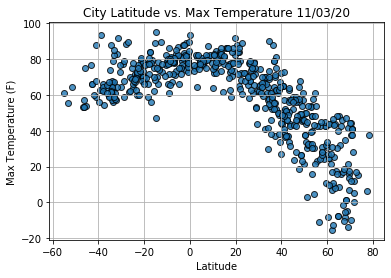

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


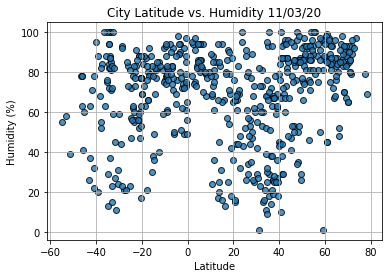

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

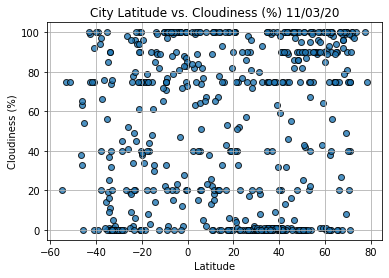

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

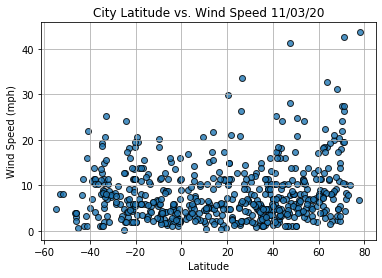

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()